# Morphological Image Processing

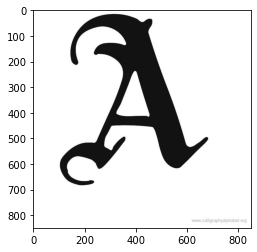

In [11]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt
img =cv.imread('A.jpg')
plt.imshow(img)

# Dilation

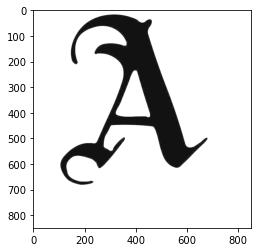

In [12]:
#DILATION
kernel = np.ones((5,5), np.uint8) 
img_dilation = cv.dilate(img, kernel, iterations=1) 
plt.imshow(img_dilation)

# Erosion

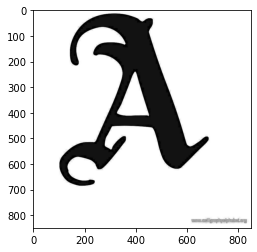

In [13]:
#EROSION:
kernel = np.ones((5,5), np.uint8) 
img_erosion = cv.erode(img, kernel, iterations=1) 
plt.imshow(img_erosion)

# Opening

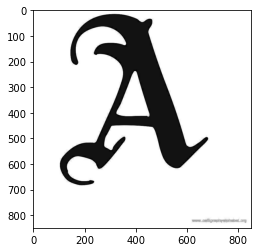

In [14]:
#OPENING
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plt.imshow(opening)

# Closing

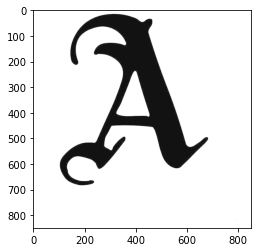

In [15]:
#CLOSING
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.imshow(closing)

# Boundary Detection

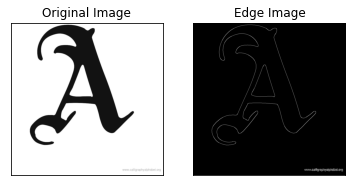

In [17]:
import cv2
img = cv2.imread('A.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Thinning

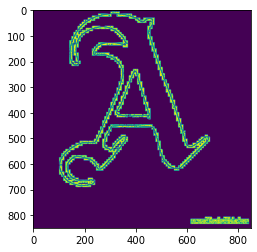

In [18]:
#THINNING
thin = np.zeros(img.shape,dtype='uint8')
img_erosion = cv.erode(img, kernel, iterations=1) 
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
subset_img = img_erosion-opening
thin = cv.bitwise_or(subset_img,thin)
plt.imshow(thin)

# Thickening

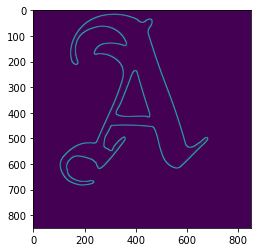

In [19]:
#THICKENING
thick =np.zeros(img.shape,dtype='uint8')
img_dilation = cv.dilate(img, kernel, iterations=1)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
subset_img2 = img_dilation-closing
thick = cv.bitwise_or(subset_img2,thick)
plt.imshow(thick)


# Convex Hull

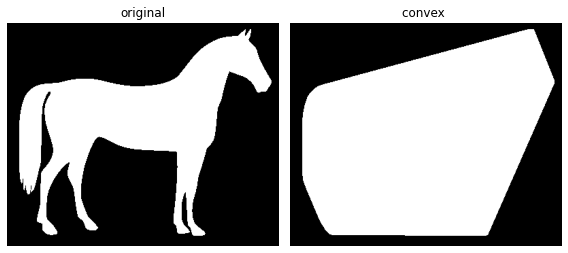

In [20]:
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage import data,img_as_float
from skimage.util import invert

img = invert(data.horse())

con_hull = convex_hull_image(img)

fig,axes = plt.subplots(1,2,figsize=(8,4))
ax = axes.ravel()

ax[0].set_title('original')
ax[0].imshow(img,cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].set_title('convex ')
ax[1].imshow(con_hull,cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()


## Skeleton

(<AxesSubplot:title={'center':'skeletonized image'}>,
 Text(0.5, 1.0, 'skeletonized image'))

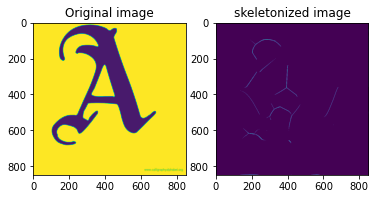

In [22]:
#Skeleton
img = cv2.imread('A.jpg',0)
plt.subplot(121),plt.imshow(img),plt.title('Original image')
ret,img = cv2.threshold(img, 127, 255, 0)

size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

while True:
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(img, open)
    eroded = cv2.erode(img, element)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    if cv2.countNonZero(img)==0:
        break
plt.subplot(122),plt.imshow(skel),plt.title('skeletonized image')

# Region Filling

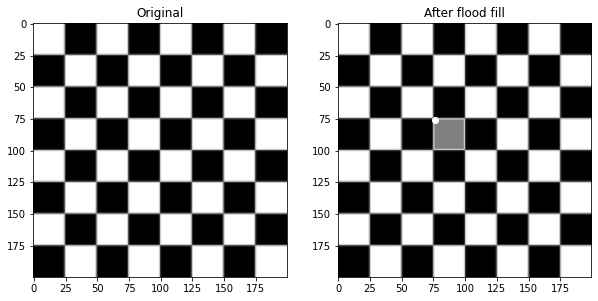

In [23]:

from skimage import data, filters, color, morphology
from skimage.segmentation import flood, flood_fill


checkers = data.checkerboard()

# Fill a square near the middle with value 127, starting at index (76, 76)
filled_checkers = flood_fill(checkers, (76, 76), 127)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(checkers, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filled_checkers, cmap=plt.cm.gray)
ax[1].plot(76, 76, 'wo')  # seed point
ax[1].set_title('After flood fill')

plt.show()
